C:\Users\robot\code\ml\landsat\collate_validation_metrics.py

In [58]:
!conda info


     active environment : tf_grid2.13
    active env location : C:\Users\robot\anaconda3\envs\tf_grid2.13
            shell level : 1
       user config file : C:\Users\robot\.condarc
 populated config files : C:\Users\robot\.condarc
          conda version : 23.7.4
    conda-build version : 3.26.1
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=x86_64
                          __cuda=12.6=0
                          __win=0=0
       base environment : C:\Users\robot\anaconda3  (writable)
      conda av data dir : C:\Users\robot\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.an

In [59]:
import os
import pandas as pd
import math
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown
%matplotlib inline

# Disable scientific notation for pandas display
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [60]:
# Directory path to search through
directory_ = r'H:\biomass'
model_run = "test_train_mlp"
model_run = "model_all01_02_03_04_05_06_v3"

directory_path = os.path.join(directory_, f"{model_run}")

combined_df = pd.read_csv(os.path.join(directory_path, "total_metrics.csv"))

## Split into groups based on status

In [61]:
retrain_df = combined_df[combined_df["status"]=="retrain"]
retest_df = combined_df[combined_df["status"]=="retest"]

In [62]:
retest_df

,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,fac,stdev,sel_num,data,stats,features,model,csv_path,file
0,0.6700000000,41832601.0799999982,6467.8100000000,4355.9000000000,417884883.3100000024,2268.1100000000,32,RFR,retest,all03_rs30,r2,3,40,all0,mean,"['dbifmdry_r43', 'b1_h99_mean', 'b1_hmc_mean',...","RandomForestRegressor(max_depth=10, max_featur...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all03_rs30_r2_RFR_sel_40_variable_score.csv
1,0.6800000000,41786712.8100000024,6464.2600000000,4407.3100000000,410526951.3199999928,2157.7700000000,32,RFR,retest,all03_rs30,r2,3,25,all0,mean,"['b1_ccw_dry_mean', 'b1_h99_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all03_rs30_r2_RFR_sel_25_variable_score.csv
2,0.6800000000,41012503.4600000009,6404.1000000000,4385.1000000000,481631907.7300000191,1801.6300000000,32,RFR,retest,all03_rs30,r2,3,20,all0,mean,"['b1_ccw_dry_mean', 'b1_h25_mean', 'b1_hsd_mea...","RandomForestRegressor(max_depth=10, max_featur...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all03_rs30_r2_RFR_sel_20_variable_score.csv
3,0.6800000000,41630922.2599999979,6452.2000000000,4469.1000000000,458893368.3600000143,1857.6000000000,32,RFR,retest,all03_rs30,r2,3,15,all0,mean,"['b5_dbifm_mean', 'b1_dp1fm_mean', 'b1_ccw_dry...","RandomForestRegressor(max_depth=10, max_featur...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all03_rs30_r2_RFR_sel_15_variable_score.csv
4,0.6700000000,42602886.6899999976,6527.0900000000,4386.6300000000,540007166.8200000525,1546.6600000000,32,RFR,retest,all03_rs30,r2,3,12,all0,mean,"['b2_dp1fm_mean', 'b1_dbifm_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all03_rs30_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,-0.3600000000,106607214.3599999994,10325.0800000000,7059.5300000000,203307934.5399999917,6627.1100000000,32,MLP,retest,all02_rs30,RMSE,3,25,all0,p99,"['b1_ccw_dry_p99', 'b1_dp1fm_dry_p99', 'b1_wfp...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all02_rs30_RMSE_MLP_sel_25_variable_score.csv
1916,-0.4300000000,111629419.0799999982,10565.4800000000,7164.8000000000,131525693.9899999946,6892.4200000000,32,MLP,retest,all02_rs30,RMSE,3,20,all0,p99,"['b1_hmc_p99', 'b2_dp1fm_p99', 'b6_dbifm_p99',...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all02_rs30_RMSE_MLP_sel_20_variable_score.csv
1917,-0.5100000000,118189092.0000000000,10871.4800000000,7295.2200000000,53306297.4799999967,7188.6100000000,32,MLP,retest,all02_rs30,RMSE,3,15,all0,p99,"['b1_hcv_p99', 'b1_wfp_dry_p99', 'b1_dp1fm_p99...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all02_rs30_RMSE_MLP_sel_15_variable_score.csv
1918,-0.5600000000,122444297.5199999958,11065.4600000000,7485.3500000000,96764816.0000000000,7285.0800000000,32,MLP,retest,all02_rs30,RMSE,3,12,all0,p99,"['b3_dp1fm_dry_p99', 'b1_dp1fm_dry_p99', 'b1_c...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all02_rs30_RMSE_MLP_sel_12_variable_score.csv


In [63]:
# Load the dataset into a DataFrame
df = retest_df.copy()

df = df[df["var"]=='all01_rs30']

# Sort the DataFrame by RMSE in ascending order
sorted_df = df.sort_values(by='rmse', ascending=True)

# Select the top 10 rows with the smallest RMSE
top_10_models = sorted_df.head(10)

Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_40': ['AGB_all01_rs30_RMSE_ABR_sel_40_variable_score.csv', 'AGB_all01_rs30_RMSE_ABR_sel_40_variable_correlation.csv', 'AGB_all01_rs30_RMSE_ABR_sel_40_variable_score.JPG', 'AGB_all01_rs30_RMSE_ABR_Top_40_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_RMSE_top_40_retrain.JPG', 'AGB_all01_rs30_ABR_RMSE_top_40_retrain_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_40_retest.JPG', 'AGB_all01_rs30_ABR_RMSE_top_40_retest_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_40_retest_predicted_data.csv']


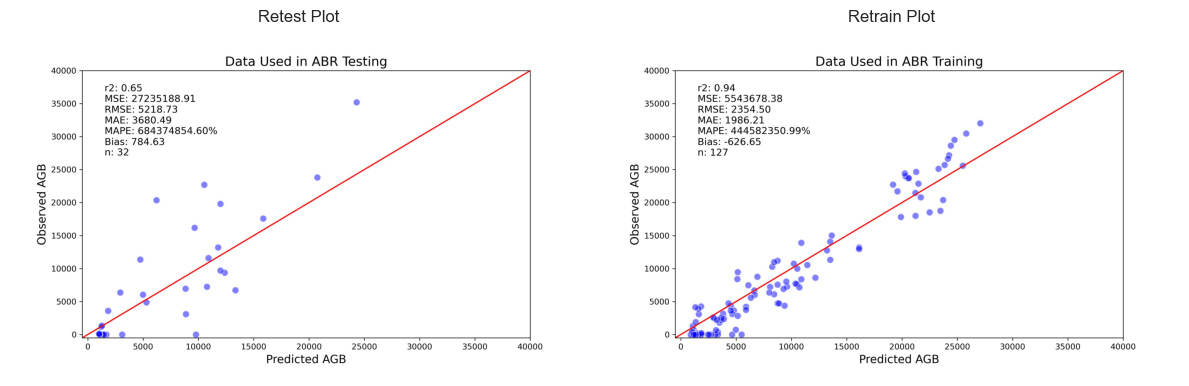

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_40\AGB_all01_rs30_ABR_RMSE_top_40_retest_metrics.csv
Retest Metrics:
 - RMSE: 5218.73
 - MAE: 3680.49
 - MAPE: 684374854.6
 - Bias: 784.63
 - R²: 0.65
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_40': ['AGB_all01_rs30_RMSE_ABR_sel_40_variable_score.csv', 'AGB_all01_rs30_RMSE_ABR_sel_40_variable_correlation.csv', 'AGB_all01_rs30_RMSE_ABR_sel_40_variable_score.JPG', 'AGB_all01_rs30_RMSE_ABR_Top_40_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_RMSE_top_40_retrain.JPG', 'AGB_all01_rs30_ABR_RMSE_top_40_retrain_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_40_retest.JPG', 'AGB_all01_rs30_ABR_RMSE_top_40_retest_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_40_retest_predicted_data.csv']


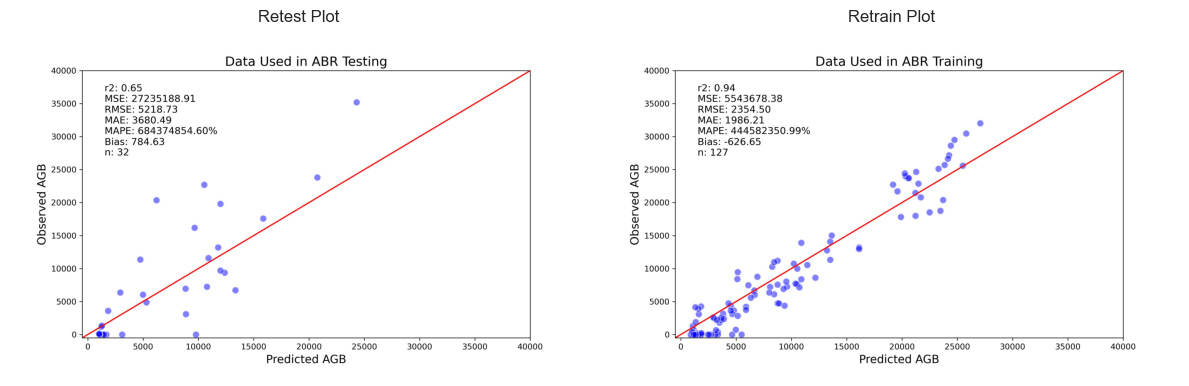

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_40\AGB_all01_rs30_ABR_RMSE_top_40_retest_metrics.csv
Retest Metrics:
 - RMSE: 5218.73
 - MAE: 3680.49
 - MAPE: 684374854.6
 - Bias: 784.63
 - R²: 0.65
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_25': ['AGB_all01_rs30_RMSE_ABR_sel_25_variable_score.csv', 'AGB_all01_rs30_RMSE_ABR_sel_25_variable_correlation.csv', 'AGB_all01_rs30_RMSE_ABR_sel_25_variable_score.JPG', 'AGB_all01_rs30_RMSE_ABR_Top_25_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_RMSE_top_25_retrain.JPG', 'AGB_all01_rs30_ABR_RMSE_top_25_retrain_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_25_retest.JPG', 'AGB_all01_rs30_ABR_RMSE_top_25_retest_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_25_retest_predicted_data.csv']


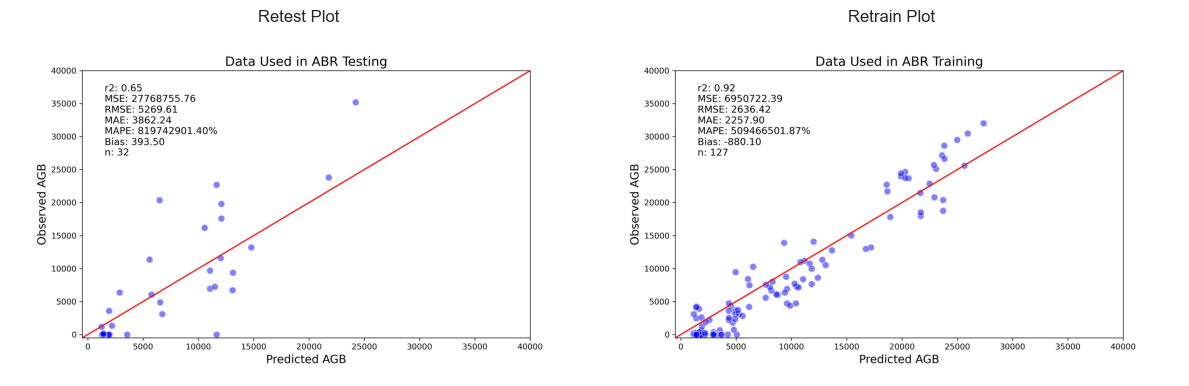

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_25\AGB_all01_rs30_ABR_RMSE_top_25_retest_metrics.csv
Retest Metrics:
 - RMSE: 5269.61
 - MAE: 3862.24
 - MAPE: 819742901.4
 - Bias: 393.5
 - R²: 0.65
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_25': ['AGB_all01_rs30_RMSE_ABR_sel_25_variable_score.csv', 'AGB_all01_rs30_RMSE_ABR_sel_25_variable_correlation.csv', 'AGB_all01_rs30_RMSE_ABR_sel_25_variable_score.JPG', 'AGB_all01_rs30_RMSE_ABR_Top_25_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_RMSE_top_25_retrain.JPG', 'AGB_all01_rs30_ABR_RMSE_top_25_retrain_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_25_retest.JPG', 'AGB_all01_rs30_ABR_RMSE_top_25_retest_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_25_retest_predicted_data.csv']


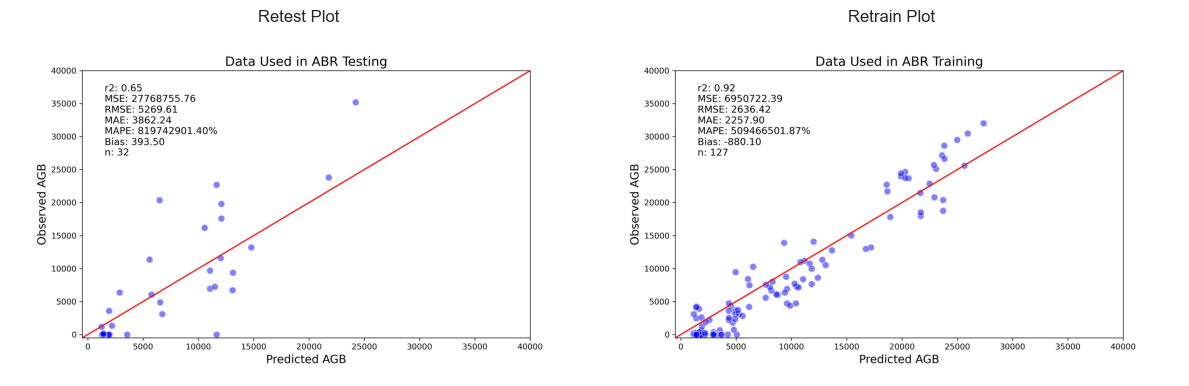

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\RMSE\sel_num_25\AGB_all01_rs30_ABR_RMSE_top_25_retest_metrics.csv
Retest Metrics:
 - RMSE: 5269.61
 - MAE: 3862.24
 - MAPE: 819742901.4
 - Bias: 393.5
 - R²: 0.65
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\MAE\sel_num_40': ['AGB_all01_rs30_MAE_ABR_sel_40_variable_score.csv', 'AGB_all01_rs30_MAE_ABR_sel_40_variable_correlation.csv', 'AGB_all01_rs30_MAE_ABR_sel_40_variable_score.JPG', 'AGB_all01_rs30_MAE_ABR_Top_40_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_MAE_top_40_retrain.JPG', 'AGB_all01_rs30_ABR_MAE_top_40_retrain_metrics.csv', 'AGB_all01_rs30_ABR_MAE_top_40_retest.JPG', 'AGB_all01_rs30_ABR_MAE_top_40_retest_metrics.csv', 'AGB_all01_rs30_ABR_MAE_top_40_retest_predicted_data.csv']


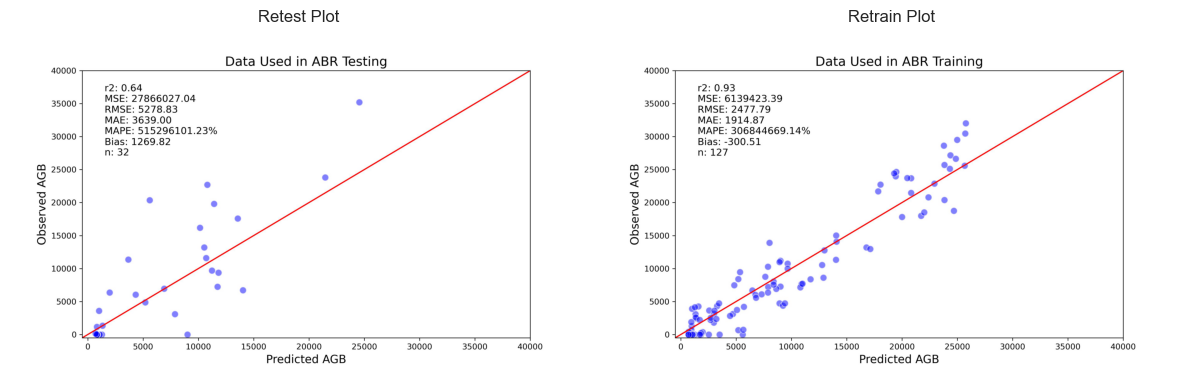

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\MAE\sel_num_40\AGB_all01_rs30_ABR_MAE_top_40_retest_metrics.csv
Retest Metrics:
 - RMSE: 5278.83
 - MAE: 3639.0
 - MAPE: 515296101.23
 - Bias: 1269.82
 - R²: 0.64
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\MAE\sel_num_40': ['AGB_all01_rs30_MAE_ABR_sel_40_variable_score.csv', 'AGB_all01_rs30_MAE_ABR_sel_40_variable_correlation.csv', 'AGB_all01_rs30_MAE_ABR_sel_40_variable_score.JPG', 'AGB_all01_rs30_MAE_ABR_Top_40_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_MAE_top_40_retrain.JPG', 'AGB_all01_rs30_ABR_MAE_top_40_retrain_metrics.csv', 'AGB_all01_rs30_ABR_MAE_top_40_retest.JPG', 'AGB_all01_rs30_ABR_MAE_top_40_retest_metrics.csv', 'AGB_all01_rs30_ABR_MAE_top_40_retest_predicted_data.csv']


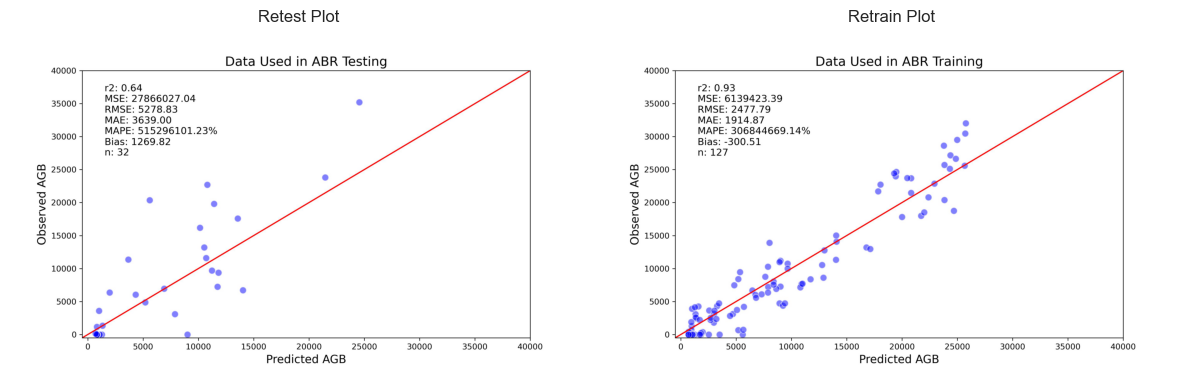

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\p99\std3\all0\MAE\sel_num_40\AGB_all01_rs30_ABR_MAE_top_40_retest_metrics.csv
Retest Metrics:
 - RMSE: 5278.83
 - MAE: 3639.0
 - MAPE: 515296101.23
 - Bias: 1269.82
 - R²: 0.64
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\GBR\mean\std3\all0\R2\sel_num_20': ['AGB_all01_rs30_r2_GBR_sel_20_variable_score.csv', 'AGB_all01_rs30_r2_GBR_sel_20_variable_correlation.csv', 'AGB_all01_rs30_r2_GBR_sel_20_variable_score.JPG', 'AGB_all01_rs30_r2_GBR_Top_20_Feature_Importance_Score.JPG', 'AGB_all01_rs30_GBR_r2_top_20_retrain.JPG', 'AGB_all01_rs30_GBR_r2_top_20_retrain_metrics.csv', 'AGB_all01_rs30_GBR_r2_top_20_retest.JPG', 'AGB_all01_rs30_GBR_r2_top_20_retest_metrics.csv', 'AGB_all01_rs30_GBR_r2_top_20_retest_predicted_data.csv']


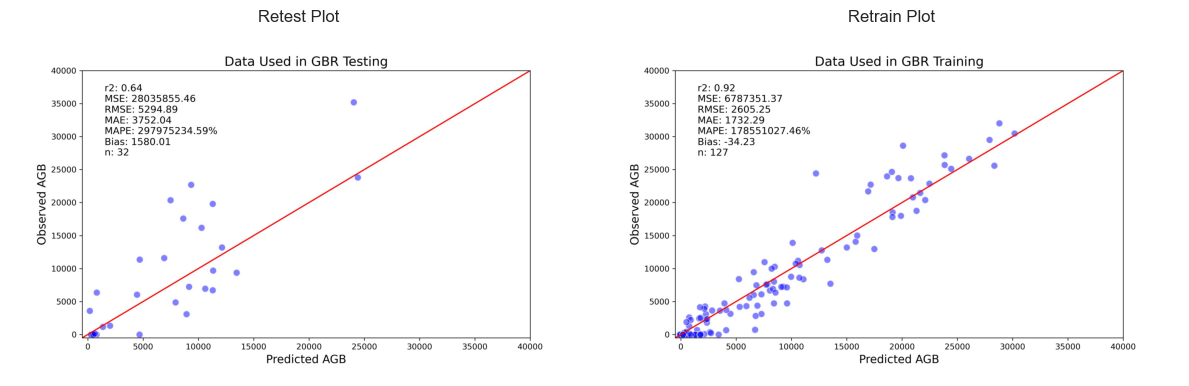

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\GBR\mean\std3\all0\R2\sel_num_20\AGB_all01_rs30_GBR_r2_top_20_retest_metrics.csv
Retest Metrics:
 - RMSE: 5294.89
 - MAE: 3752.04
 - MAPE: 297975234.59
 - Bias: 1580.01
 - R²: 0.64
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\GBR\mean\std3\all0\R2\sel_num_20': ['AGB_all01_rs30_r2_GBR_sel_20_variable_score.csv', 'AGB_all01_rs30_r2_GBR_sel_20_variable_correlation.csv', 'AGB_all01_rs30_r2_GBR_sel_20_variable_score.JPG', 'AGB_all01_rs30_r2_GBR_Top_20_Feature_Importance_Score.JPG', 'AGB_all01_rs30_GBR_r2_top_20_retrain.JPG', 'AGB_all01_rs30_GBR_r2_top_20_retrain_metrics.csv', 'AGB_all01_rs30_GBR_r2_top_20_retest.JPG', 'AGB_all01_rs30_GBR_r2_top_20_retest_metrics.csv', 'AGB_all01_rs30_GBR_r2_top_20_retest_predicted_data.csv']


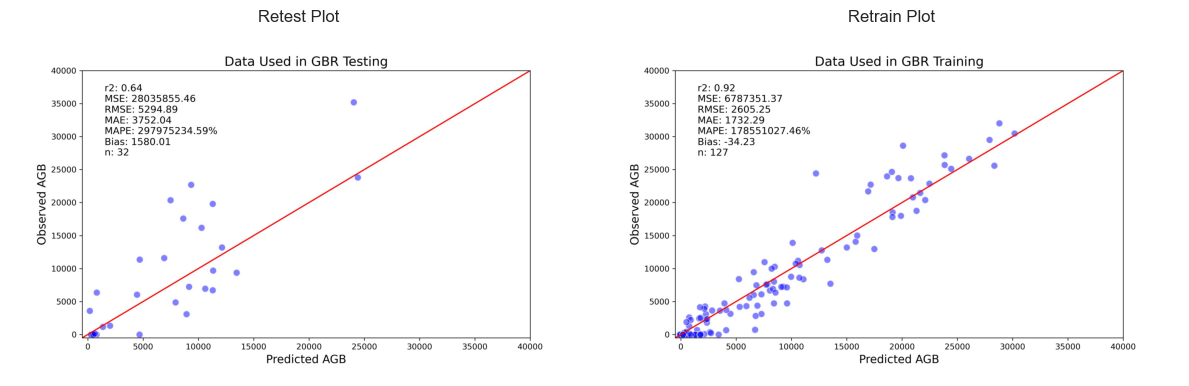

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\GBR\mean\std3\all0\R2\sel_num_20\AGB_all01_rs30_GBR_r2_top_20_retest_metrics.csv
Retest Metrics:
 - RMSE: 5294.89
 - MAE: 3752.04
 - MAPE: 297975234.59
 - Bias: 1580.01
 - R²: 0.64
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\mean\std3\all0\DEF\sel_num_15': ['AGB_all01_rs30_RMSE_ABR_sel_15_variable_score.csv', 'AGB_all01_rs30_RMSE_ABR_sel_15_variable_correlation.csv', 'AGB_all01_rs30_RMSE_ABR_sel_15_variable_score.JPG', 'AGB_all01_rs30_RMSE_ABR_Top_15_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_RMSE_top_15_retrain.JPG', 'AGB_all01_rs30_ABR_RMSE_top_15_retrain_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_15_retest.JPG', 'AGB_all01_rs30_ABR_RMSE_top_15_retest_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_15_retest_predicted_data.csv']


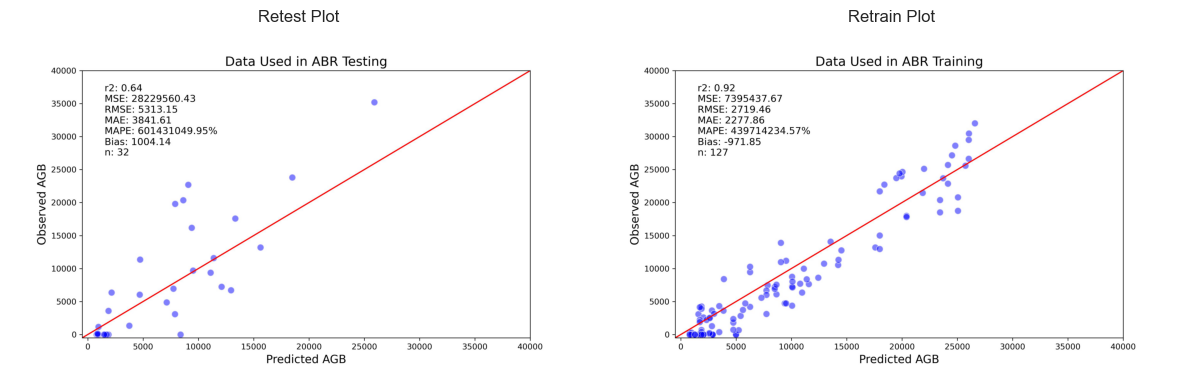

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\mean\std3\all0\DEF\sel_num_15\AGB_all01_rs30_ABR_RMSE_top_15_retest_metrics.csv
Retest Metrics:
 - RMSE: 5313.15
 - MAE: 3841.61
 - MAPE: 601431049.95
 - Bias: 1004.14
 - R²: 0.64
--------------------------------------------------
Files in directory 'H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\mean\std3\all0\DEF\sel_num_15': ['AGB_all01_rs30_RMSE_ABR_sel_15_variable_score.csv', 'AGB_all01_rs30_RMSE_ABR_sel_15_variable_correlation.csv', 'AGB_all01_rs30_RMSE_ABR_sel_15_variable_score.JPG', 'AGB_all01_rs30_RMSE_ABR_Top_15_Feature_Importance_Score.JPG', 'AGB_all01_rs30_ABR_RMSE_top_15_retrain.JPG', 'AGB_all01_rs30_ABR_RMSE_top_15_retrain_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_15_retest.JPG', 'AGB_all01_rs30_ABR_RMSE_top_15_retest_metrics.csv', 'AGB_all01_rs30_ABR_RMSE_top_15_retest_predicted_data.csv']


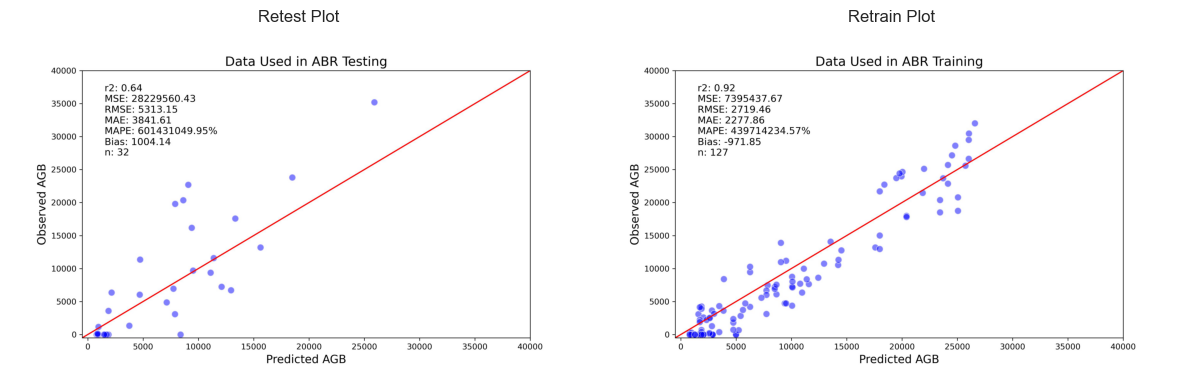

CSV Path: H:\biomass\model_all01_02_03_04_05_06_v3\AGB\all01_rs30\ABR\mean\std3\all0\DEF\sel_num_15\AGB_all01_rs30_ABR_RMSE_top_15_retest_metrics.csv
Retest Metrics:
 - RMSE: 5313.15
 - MAE: 3841.61
 - MAPE: 601431049.95
 - Bias: 1004.14
 - R²: 0.64
--------------------------------------------------
C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v3_overall_best.csv


In [64]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for index, row in top_10_models.iterrows():
    csv_directory = os.path.dirname(row['csv_path'])

    # Debug: List all files in the directory
    print(f"Files in directory '{csv_directory}': {os.listdir(csv_directory)}")

    # Use glob to find retest and retrain plots
    retest_plot_files = glob.glob(os.path.join(csv_directory, "*retest.JPG"))
    retrain_plot_files = glob.glob(os.path.join(csv_directory, "*retrain.JPG"))

    if retest_plot_files and retrain_plot_files:
        # Take the first matching files
        retest_plot_path = retest_plot_files[0]
        retrain_plot_path = retrain_plot_files[0]

        # Plot the images side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        retest_img = mpimg.imread(retest_plot_path)
        axes[0].imshow(retest_img)
        axes[0].set_title("Retest Plot")
        axes[0].axis("off")

        retrain_img = mpimg.imread(retrain_plot_path)
        axes[1].imshow(retrain_img)
        axes[1].set_title("Retrain Plot")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

        # Print CSV path and metrics
        print(f"CSV Path: {row['csv_path']}")
        print(f"Retest Metrics:")
        print(f" - RMSE: {row['rmse']}")
        print(f" - MAE: {row['mae']}")
        print(f" - MAPE: {row['mape']}")
        print(f" - Bias: {row['bias']}")
        print(f" - R²: {row['r2']}")
        print("-" * 50)
    else:
        print(f"Missing plots for model: {row['file']}")
        if not retest_plot_files:
            print(" - Retest plot not found.")
        if not retrain_plot_files:
            print(" - Retrain plot not found.")
            
top_10_models.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_overall_best.csv".format(model_run))
print(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_overall_best.csv".format(model_run))


In [82]:
top_10_models

,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,fac,stdev,sel_num,data,stats,features,model,csv_path,file
1428,0.6500000000,27235188.9100000001,5218.7300000000,3680.4900000000,684374854.6000000238,784.6300000000,32,ABR,retest,all01_rs30,RMSE,3,40,all0,p99,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p...",AdaBoostRegressor(estimator=DecisionTreeRegres...,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_ABR_sel_40_variable_score.csv
468,0.6500000000,27235188.9100000001,5218.7300000000,3680.4900000000,684374854.6000000238,784.6300000000,32,ABR,retest,all01_rs30,RMSE,3,40,all0,p99,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p...",AdaBoostRegressor(estimator=DecisionTreeRegres...,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_ABR_sel_40_variable_score.csv
469,0.6500000000,27768755.7600000016,5269.6100000000,3862.2400000000,819742901.3999999762,393.5000000000,32,ABR,retest,all01_rs30,RMSE,3,25,all0,p99,"['b1_dp1fm_p99', 'b1_dp1fm_dry_p99', 'b3_dp1fm...",AdaBoostRegressor(estimator=DecisionTreeRegres...,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_ABR_sel_25_variable_score.csv
1429,0.6500000000,27768755.7600000016,5269.6100000000,3862.2400000000,819742901.3999999762,393.5000000000,32,ABR,retest,all01_rs30,RMSE,3,25,all0,p99,"['b1_dp1fm_p99', 'b1_dp1fm_dry_p99', 'b3_dp1fm...",AdaBoostRegressor(estimator=DecisionTreeRegres...,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_ABR_sel_25_variable_score.csv
1422,0.6400000000,27866027.0399999991,5278.8300000000,3639.0000000000,515296101.2300000191,1269.8200000000,32,ABR,retest,all01_rs30,MAE,3,40,all0,p99,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p...",AdaBoostRegressor(estimator=DecisionTreeRegres...,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_MAE_ABR_sel_40_variable_score.csv
462,0.6400000000,27866027.0399999991,5278.8300000000,3639.0000000000,515296101.2300000191,1269.8200000000,32,ABR,retest,all01_rs30,MAE,3,40,all0,p99,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p...",AdaBoostRegressor(estimator=DecisionTreeRegres...,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_MAE_ABR_sel_40_variable_score.csv
482,0.6400000000,28035855.4600000009,5294.8900000000,3752.0400000000,297975234.5899999738,1580.0100000000,32,GBR,retest,all01_rs30,r2,3,20,all0,mean,"['b6_dbifm_mean', 'dbifmdry_GSAVI', 'dbifmdry_...","GradientBoostingRegressor(max_depth=2, max_fea...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_r2_GBR_sel_20_variable_score.csv
1442,0.6400000000,28035855.4600000009,5294.8900000000,3752.0400000000,297975234.5899999738,1580.0100000000,32,GBR,retest,all01_rs30,r2,3,20,all0,mean,"['b6_dbifm_mean', 'dbifmdry_GSAVI', 'dbifmdry_...","GradientBoostingRegressor(max_depth=2, max_fea...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_r2_GBR_sel_20_variable_score.csv
453,0.6400000000,28229560.4299999997,5313.1500000000,3841.6100000000,601431049.9500000477,1004.1400000000,32,ABR,retest,all01_rs30,RMSE,3,15,all0,mean,"['dbifmdry_GNDVI', 'dbifman_GNDVI', 'b2_dp1fm_...",AdaBoostRegressor(),H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_ABR_sel_15_variable_score.csv
1413,0.6400000000,28229560.4299999997,5313.1500000000,3841.6100000000,601431049.9500000477,1004.1400000000,32,ABR,retest,all01_rs30,RMSE,3,15,all0,mean,"['dbifmdry_GNDVI', 'dbifman_GNDVI', 'b2_dp1fm_...",AdaBoostRegressor(),H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_ABR_sel_15_variable_score.csv


In [84]:
# Find the model with the lowest RMSE
best_perform_model = top_10_models.loc[top_10_models['rmse'].idxmin()]

# Calculate summary statistics
summary_stats = top_10_models.describe()

# Output results
print("Summary Statistics:")
print(summary_stats)
print("\nModel with the Lowest RMSE:")
print(best_perform_model)

Summary Statistics:
                 r2                 mse            rmse             mae  \
count 10.0000000000       10.0000000000   10.0000000000   10.0000000000   
mean   0.6440000000 27827077.5199999996 5275.0420000000 3755.0760000000   
std    0.0051639778   353028.5920174397   33.5362479847   91.9156406954   
min    0.6400000000 27235188.9100000001 5218.7300000000 3639.0000000000   
25%    0.6400000000 27768755.7600000016 5269.6100000000 3680.4900000000   
50%    0.6400000000 27866027.0399999991 5278.8300000000 3752.0400000000   
75%    0.6500000000 28035855.4600000009 5294.8900000000 3841.6100000000   
max    0.6500000000 28229560.4299999997 5313.1500000000 3862.2400000000   

                      mape            bias             n         stdev  \
count        10.0000000000   10.0000000000 10.0000000000 10.0000000000   
mean  583764028.3539998531 1006.4200000000 32.0000000000  3.0000000000   
std   184079561.4339843094  427.7205674009  0.0000000000  0.0000000000   
min   29

In [87]:
# Normalise metrics
sorted_df['RMSE_norm'] = sorted_df['rmse'] / sorted_df['rmse'].max()  # Lower is better
sorted_df['MAE_norm'] = sorted_df['mae'] / sorted_df['mae'].max()    # Lower is better
sorted_df['R2_norm'] = 1 - ((sorted_df['r2'].max() - sorted_df['r2']) / (sorted_df['r2'].max() - sorted_df['r2'].min()))  # Higher is better

# Assign weights to each metric (optional)
weights = {'rmse': 0.8, 'mae': 0.1, 'r2': 0.1}

# Calculate combined score
sorted_df['Score'] = (
    sorted_df['RMSE_norm'] * weights['rmse'] +
    sorted_df['MAE_norm'] * weights['mae'] +
    sorted_df['R2_norm'] * weights['r2']
)

# Rank models based on the score
sorted_df['Rank'] = sorted_df['Score'].rank(ascending=True)

# Sort by rank
df_rank = sorted_df.sort_values(by='Rank')

# Output results
df_rank[['mdl', 'rmse', 'mae', 'r2', 'Score', 'Rank', 'csv_path', 'model', 'features']]

,mdl,rmse,mae,r2,Score,Rank,csv_path,model,features
1428,ABR,5218.7300000000,3680.4900000000,0.6500000000,0.4940383985,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,AdaBoostRegressor(estimator=DecisionTreeRegres...,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p..."
468,ABR,5218.7300000000,3680.4900000000,0.6500000000,0.4940383985,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,AdaBoostRegressor(estimator=DecisionTreeRegres...,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p..."
1422,ABR,5278.8300000000,3639.0000000000,0.6400000000,0.4968622386,3.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,AdaBoostRegressor(estimator=DecisionTreeRegres...,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p..."
462,ABR,5278.8300000000,3639.0000000000,0.6400000000,0.4968622386,3.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,AdaBoostRegressor(estimator=DecisionTreeRegres...,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p..."
482,GBR,5294.8900000000,3752.0400000000,0.6400000000,0.4993339838,5.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"GradientBoostingRegressor(max_depth=2, max_fea...","['b6_dbifm_mean', 'dbifmdry_GSAVI', 'dbifmdry_..."
...,...,...,...,...,...,...,...,...,...
655,MLP,11980.4300000000,8077.6300000000,-0.8300000000,0.8999790225,523.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['dbifman_GSAVI', 'dbifmdry_NDII', 'b2_dp1fm_d..."
634,MLP,11980.5700000000,8077.3900000000,-0.8300000000,0.8999853999,525.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b4_dbifm_mean', 'b5_dbifm_mean', 'b3_dp1fm_d..."
1594,MLP,11980.5700000000,8077.3900000000,-0.8300000000,0.8999853999,525.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b4_dbifm_mean', 'b5_dbifm_mean', 'b3_dp1fm_d..."
631,MLP,11980.6700000000,8077.5600000000,-0.8300000000,0.8999941817,527.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['b4_dbifm_mean', 'dbifmdry_r42', 'dbifman_GSA..."


In [92]:
# Group by 'mdl' and get the best rank (minimum score) per model
best_rank_per_model = df_rank.groupby('mdl', as_index=False).first()

# Sort the models by Rank for clear display
best_rank_per_model = best_rank_per_model.sort_values(by='Rank')

# Output the results
print("Best Rank for Each Model:")
best_rank_per_model[['mdl', 'rmse', 'mae', 'r2', 'Score', 'Rank', 'csv_path', 'model', 'features']]


Best Rank for Each Model:


,mdl,rmse,mae,r2,Score,Rank,csv_path,model,features
0,ABR,5218.7300000000,3680.4900000000,0.6500000000,0.4940383985,1.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,AdaBoostRegressor(estimator=DecisionTreeRegres...,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p..."
1,GBR,5294.8900000000,3752.0400000000,0.6400000000,0.4993339838,5.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"GradientBoostingRegressor(max_depth=2, max_fea...","['b6_dbifm_mean', 'dbifmdry_GSAVI', 'dbifmdry_..."
2,KNN,5396.3700000000,4009.4400000000,0.6300000000,0.5086209773,24.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"KNeighborsRegressor(n_neighbors=15, p=1, weigh...","['dbifmdry_r43', 'dbifman_CVI', 'dbifmdry_CVI'..."
4,RFR,5445.8900000000,3812.4500000000,0.6200000000,0.5088133719,31.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"RandomForestRegressor(max_depth=4, max_feature...","['dbifmdry_NBR', 'b3_dp1fm_dry_p99', 'dbifman_..."
5,XGBR,5517.0400000000,3636.3500000000,0.6100000000,0.5107086956,41.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"XGBRegressor(base_score=None, booster=None, ca...","['b2_dp1fm_p99', 'b2_dbifm_p99', 'b3_dp1fm_p99..."
3,MLP,9620.1000000000,6589.1900000000,-0.1800000000,0.7678629463,433.5000000000,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,"Pipeline(steps=[('scaler', StandardScaler()),\...","['dbifmdry_NDVI', 'dbifmdry_r42', 'dbifmdry_MS..."


In [93]:
# Group by 'mdl' and find the row with the minimum 'rmse' for each model
lowest_rmse_df = sorted_df.loc[sorted_df.groupby('mdl')['rmse'].idxmin()]
# Reset index for cleaner presentation
lowest_rmse_df = lowest_rmse_df.reset_index(drop=True)

# Display the table with the lowest RMSE per model
print("Table of Lowest RMSE for Each Model:")
lowest_rmse_df

Table of Lowest RMSE for Each Model:


,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,...,stats,features,model,csv_path,file,RMSE_norm,MAE_norm,R2_norm,Score,Rank
0,0.6500000000,27235188.9100000001,5218.7300000000,3680.4900000000,684374854.6000000238,784.6300000000,32,ABR,retest,all01_rs30,...,p99,"['dbifmdry_GNDVI', 'dbifmdry_r42', 'b6_dbifm_p...",AdaBoostRegressor(estimator=DecisionTreeRegres...,H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_ABR_sel_40_variable_score.csv,0.4355958390,0.4556172730,1.0000000000,0.4940383985,1.5000000000
1,0.6400000000,28035855.4600000009,5294.8900000000,3752.0400000000,297975234.5899999738,1580.0100000000,32,GBR,retest,all01_rs30,...,mean,"['b6_dbifm_mean', 'dbifmdry_GSAVI', 'dbifmdry_...","GradientBoostingRegressor(max_depth=2, max_fea...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_r2_GBR_sel_20_variable_score.csv,0.4419527455,0.4644746306,0.9932432432,0.4993339838,5.5000000000
2,0.6300000000,29120850.0399999991,5396.3700000000,4009.4400000000,603244715.9600000381,961.5900000000,32,KNN,retest,all01_rs30,...,p99,"['dbifmdry_r43', 'dbifman_CVI', 'dbifmdry_CVI'...","KNeighborsRegressor(n_neighbors=15, p=1, weigh...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_KNN_sel_40_variable_score.csv,0.4504230565,0.4963388351,0.9864864865,0.5086209773,24.5000000000
3,-0.1800000000,92546376.1800000072,9620.1000000000,6589.1900000000,249766659.3799999952,6069.2400000000,32,MLP,retest,all01_rs30,...,p99,"['dbifmdry_NDVI', 'dbifmdry_r42', 'dbifmdry_MS...","Pipeline(steps=[('scaler', StandardScaler()),\...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_MLP_sel_40_variable_score.csv,0.8029684483,0.8156926874,0.4391891892,0.7678629463,433.5000000000
4,0.6200000000,29657744.4100000001,5445.8900000000,3812.4500000000,447056334.8000000119,1326.5500000000,32,RFR,retest,all01_rs30,...,p99,"['dbifmdry_NBR', 'b3_dp1fm_dry_p99', 'dbifman_...","RandomForestRegressor(max_depth=4, max_feature...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_MAE_RFR_sel_20_variable_score.csv,0.4545563812,0.4719529390,0.9797297297,0.5088133719,31.5000000000
5,0.6100000000,30437754.4699999988,5517.0400000000,3636.3500000000,385432867.7900000215,1093.4500000000,32,XGBR,retest,all01_rs30,...,p99,"['b2_dp1fm_p99', 'b2_dbifm_p99', 'b3_dp1fm_p99...","XGBRegressor(base_score=None, booster=None, ca...",H:\biomass\model_all01_02_03_04_05_06_v3\AGB\a...,all01_rs30_RMSE_XGBR_sel_10_variable_score.csv,0.4604951142,0.4501530695,0.9729729730,0.5107086956,41.5000000000


In [94]:
best_rank_per_model.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_AGB_best_model_results.csv".format(model_run))
#best_rank_per_model.to_csv(r"H:\biomass\model_test_train_all01_02_03_04_05_06_final\AGB_best_model_results_rs30_all01.csv", index=False)
print(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_AGB_best_model_results.csv".format(model_run))

C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v3_AGB_best_model_results.csv


In [90]:
# Group by 'mdl' to calculate the mean rank and mean score for each model type
overall_ranking = df_rank.groupby('mdl', as_index=False).agg({
    'Score': 'mean',  # Average score
    'Rank': 'mean'    # Average rank
}).sort_values(by='Rank')  # Sort by mean rank

# Rename columns for clarity
overall_ranking = overall_ranking.rename(columns={'Score': 'Mean_Score', 'Rank': 'Mean_Rank'})

# Display the overall ranking
print("Overall Model Performance:")
overall_ranking


Overall Model Performance:


,mdl,Mean_Score,Mean_Rank
4,RFR,0.5228493275,114.0000000000
2,KNN,0.5345356417,178.9166666667
0,ABR,0.5418375484,214.7083333333
5,XGBR,0.5464585473,253.5416666667
1,GBR,0.5552116087,270.0833333333
3,MLP,0.8814705241,480.5000000000


In [91]:
grouped_df = sorted_df.groupby(['mdl'])[['rmse', 'r2', 'mae']].agg(['mean', 'std']).reset_index()
grouped_df


mdl             rmse                           r2               \
                    mean            std          mean          std   
0   ABR  5907.3872916667 449.5554727377  0.5512500000 0.0688438355   
1   GBR  6172.5931250000 494.4053801196  0.5104166667 0.0789392393   
2   KNN  5799.2535416667 186.3919795371  0.5697916667 0.0283206886   
3   MLP 11646.6406250000 640.5803252361 -0.7354166667 0.1801631814   
4   RFR  5647.0079166667 193.7224195766  0.5920833333 0.0282811367   
5  XGBR  6022.8504166667 312.6588033991  0.5350000000 0.0492896915   

              mae                 
             mean            std  
0 4366.0633333333 418.3744967891  
1 4238.7660416667 332.9849409507  
2 4258.2883333333 144.9296501913  
3 7866.7339583333 401.2668834827  
4 4013.8129166667 135.2451243619  
5 4205.2306250000 251.4161418877

In [81]:
sorted_df

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,features_retest,model,file,file_path,apply_mdl,RMSE_norm,MAE_norm,R2_norm,Score,Rank
2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8500000000,...,"['b2_dp1fm_dry_p99', 'b5_dbifm_p99', 'b2_dbifm...","XGBRegressor(base_score=None, booster=None, ca...",all01_rs30_MAE_XGBR_sel_10_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v3/AGB/a...,NaN,0.2647197527,0.2499433649,1.0000000000,0.3367701387,1.5000000000
515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8500000000,...,"['b2_dp1fm_dry_p99', 'b5_dbifm_p99', 'b2_dbifm...","XGBRegressor(base_score=None, booster=None, ca...",all01_rs30_MAE_XGBR_sel_10_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v3/AGB/a...,NaN,0.2647197527,0.2499433649,1.0000000000,0.3367701387,1.5000000000
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8100000000,...,"['b2_dbifm_mean', 'b6_dbifm_mean', 'b1_dbifm_m...","GradientBoostingRegressor(max_depth=5, max_fea...",all01_rs30_MAE_GBR_sel_10_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v3/AGB/a...,NaN,0.2930353645,0.2841088731,0.9761904762,0.3604582265,5.5000000000
1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8100000000,...,"['b2_dbifm_mean', 'b6_dbifm_mean', 'b1_dbifm_m...","GradientBoostingRegressor(max_depth=5, max_fea...",all01_rs30_MAE_GBR_sel_10_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v3/AGB/a...,NaN,0.2930353645,0.2841088731,0.9761904762,0.3604582265,5.5000000000
425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8100000000,...,"['b4_dbifm_p99', 'b1_dp1fm_p99', 'b2_dp1fm_p99...","GradientBoostingRegressor(max_depth=7, max_fea...",all01_rs30_RMSE_GBR_sel_10_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v3/AGB/a...,NaN,0.2969600198,0.2493380193,0.9761904762,0.3601208654,3.5000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,all01_rs30_XGBR_p99_std3_all0_MAE_sel_num_10,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,all01_rs30_XGBR_p99_std3_all0_MAE_sel_num_10,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,all01_rs30_GBR_mean_std3_all0_MAE_sel_num_10,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,all01_rs30_GBR_mean_std3_all0_MAE_sel_num_10,NaN,NaN,NaN,NaN,NaN
